# ***Imports and CSV read---> Hot Code Encoding---> Null values removal***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model, Sequential
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"/content/drive/MyDrive/DL_Datasets/Train_data.csv")

In [3]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [4]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train.shape

(25192, 42)

In [7]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include="object")

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [11]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
train[numeric_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)

In [12]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<Axes: xlabel='class', ylabel='count'>

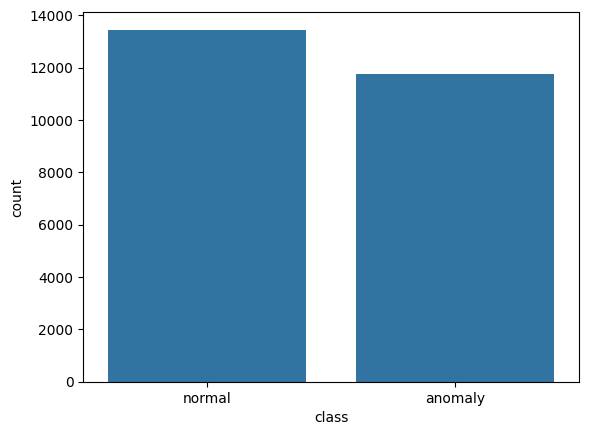

In [13]:
sns.countplot(x=train['class'])

In [14]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)

In [15]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [16]:
train['class']

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int64

In [17]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print("Categorical columns still present in the DataFrame:")
    print(categorical_cols)
else:
    print("No categorical columns remaining in the DataFrame.")

No categorical columns remaining in the DataFrame.


In [18]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']
X_train.shape

(25192, 41)

# **Feature Selection**

In [19]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Initialize RFE to select 10 features
rfe = RFE(estimator=rfc, n_features_to_select=10)

# Fit RFE on your training data
rfe.fit(X_train, Y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Combine with feature names
feature_importance_map = dict(zip(X_train.columns, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

# Print top features
# top_features = sorted_features[:10]  # Change the number to get a different count of top features
# top_features
sorted_features
# top_features = sorted_features[:10]  # Change the number to get a different count of top features
top_features=[feature[0] for feature in sorted_features[:10]]
top_features

['src_bytes',
 'dst_bytes',
 'flag',
 'diff_srv_rate',
 'dst_host_srv_count',
 'same_srv_rate',
 'dst_host_srv_serror_rate',
 'dst_host_same_srv_rate',
 'serror_rate',
 'dst_host_diff_srv_rate']

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize SelectKBest
k_best = SelectKBest(score_func=chi2, k=10)  # Change k to get a different count of top features

# Fit SelectKBest on your data
X_k_best = k_best.fit_transform(X_train, Y_train)

# Get selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get corresponding feature names
selected_feature = X_train.columns[selected_indices]
selected_feature

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_serror_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [22]:
common_features = list(set(selected_features).intersection(set(selected_feature)).intersection(set(top_features)))
common_features

['dst_bytes', 'dst_host_srv_count', 'flag', 'src_bytes']

In [23]:
combined_features = list(set(selected_features).union(set(selected_feature)).union(set(top_features)))
combined_features

['dst_bytes',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'protocol_type',
 'service',
 'duration',
 'same_srv_rate',
 'srv_serror_rate',
 'count',
 'src_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'diff_srv_rate',
 'dst_host_srv_count',
 'serror_rate',
 'dst_host_diff_srv_rate']

In [24]:
feature_count = {}
for feature in combined_features:
    feature_count[feature] = feature_count.get(feature, 0) + 1

In [25]:
total = sorted(feature_count.items(), key=lambda x: x[1], reverse=True)

In [26]:
final_features = [feature[0] for feature in total[:15]]
final_features

['dst_bytes',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'protocol_type',
 'service',
 'duration',
 'same_srv_rate',
 'srv_serror_rate',
 'count',
 'src_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'diff_srv_rate',
 'dst_host_srv_count']

In [27]:
final=X_train[final_features]
final.shape

(25192, 15)

# ***Partitioning the data to Test and Train***

In [28]:
# Splitting the dataset into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(final, Y_train, test_size=0.2, random_state=42)

In [29]:
final1=final.to_numpy()
final1

array([[0.00e+00, 1.50e+02, 1.70e-01, ..., 9.00e+00, 0.00e+00, 2.50e+01],
       [0.00e+00, 2.55e+02, 0.00e+00, ..., 9.00e+00, 1.50e-01, 1.00e+00],
       [0.00e+00, 2.55e+02, 1.00e-01, ..., 5.00e+00, 7.00e-02, 2.60e+01],
       ...,
       [0.00e+00, 2.55e+02, 5.00e-02, ..., 1.00e+00, 7.00e-02, 1.30e+01],
       [0.00e+00, 2.55e+02, 8.00e-02, ..., 5.00e+00, 6.00e-02, 2.00e+01],
       [0.00e+00, 2.55e+02, 1.90e-01, ..., 5.00e+00, 1.10e-01, 4.90e+01]])

In [30]:
x_train.shape

(20153, 15)

In [31]:
x_val.shape

(5039, 15)

# ***Label Encoding - feature encoding***

In [32]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [33]:
y_val_encoded.shape

(5039,)

#***Training the Ensemble Model***

In [34]:
import xgboost as xgb
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, GRU, concatenate
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras

In [35]:
# Step 1: Define the CNN-GRU model
def create_cnn_gru_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add((GRU(64)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (x_train.shape[1], 1)
cnn_gru_model = create_cnn_gru_model(input_shape)

# Reshape input data for CNN-GRU model
x_train_reshaped = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val_reshaped = x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1))

In [36]:
class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.precision = []
        self.recall = []
        self.f1s = []

    def on_epoch_end(self, epoch, logs=None):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _precision, _recall, _f1, _ = precision_recall_fscore_support(val_targ, val_predict, average='binary')
        self.precision.append(_precision)
        self.recall.append(_recall)
        self.f1s.append(_f1)

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
metrics_callback = MetricsCallback(validation_data=(x_val_reshaped, y_val_encoded))
history = cnn_gru_model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_val_reshaped, y_val_encoded), callbacks=[metrics_callback])

Epoch 1/50
630/630 [==============================] - 10s 11ms/step - loss: 0.2021 - accuracy: 0.9186 - val_loss: 0.1292 - val_accuracy: 0.9430
Epoch 2/50
630/630 [==============================] - 7s 11ms/step - loss: 0.1542 - accuracy: 0.9394 - val_loss: 0.1082 - val_accuracy: 0.9613
Epoch 3/50
630/630 [==============================] - 5s 8ms/step - loss: 0.1547 - accuracy: 0.9426 - val_loss: 0.1150 - val_accuracy: 0.9631
Epoch 4/50
630/630 [==============================] - 10s 16ms/step - loss: 0.1567 - accuracy: 0.9377 - val_loss: 0.1183 - val_accuracy: 0.9446
Epoch 5/50
630/630 [==============================] - 5s 8ms/step - loss: 0.1470 - accuracy: 0.9394 - val_loss: 0.1153 - val_accuracy: 0.9633
Epoch 6/50
630/630 [==============================] - 6s 10ms/step - loss: 0.1367 - accuracy: 0.9445 - val_loss: 0.1020 - val_accuracy: 0.9637
Epoch 7/50
630/630 [==============================] - 6s 10ms/step - loss: 0.1441 - accuracy: 0.9425 - val_loss: 0.1075 - val_accuracy: 0.9478

In [38]:
# Step 3: Generate predictions from the CNN-GRU model
train_preds = cnn_gru_model.predict(x_train_reshaped)
val_preds = cnn_gru_model.predict(x_val_reshaped)

# Combine predictions with original features
x_train_stack = np.hstack((x_train, train_preds))
x_val_stack = np.hstack((x_val, val_preds))

158/158 [==============================] - 0s 3ms/step


In [39]:
# Step 4: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_stack, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [40]:
# Evaluate the model
y_val_pred = xgb_model.predict(x_val_stack)
accuracy = accuracy_score(y_val_encoded, y_val_pred)
classification_rep = classification_report(y_val_encoded, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Validation Accuracy: 0.9972216709664616
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



#***Model Visualization***

In [41]:
from keras.utils import plot_model
import tempfile
import pydot
from IPython.display import Image, display
from keras.models import Model
from keras.layers import Input, Dense

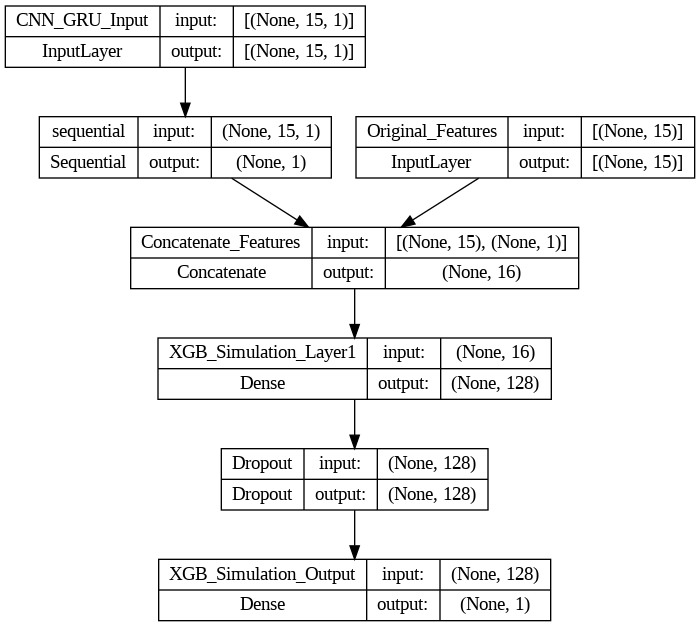

In [42]:
# Function to create a combined model for visualization
def create_combined_model(input_shape):
    # Input layer for original features
    input_original = Input(shape=input_shape, name='Original_Features')

    # CNN-GRU model input
    cnn_gru_input = Input(shape=(input_shape[0], 1), name='CNN_GRU_Input')
    cnn_gru_output = cnn_gru_model(cnn_gru_input)

    # Combine original features with CNN-GRU output
    combined_input = concatenate([input_original, cnn_gru_output], name='Concatenate_Features')

    # Dense layers to simulate XGBoost model
    xgb_simulation = Dense(128, activation='relu', name='XGB_Simulation_Layer1')(combined_input)
    xgb_simulation = Dropout(0.5, name='Dropout')(xgb_simulation)
    xgb_simulation = Dense(1, activation='sigmoid', name='XGB_Simulation_Output')(xgb_simulation)

    # Create the combined model
    combined_model = Model(inputs=[input_original, cnn_gru_input], outputs=xgb_simulation)
    return combined_model

# Create the combined model for visualization purposes
combined_model = create_combined_model((x_train.shape[1],))

# Plot the model
with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
    plot_model(combined_model, to_file=tmpfile.name, show_shapes=True, show_layer_names=True)
    display(Image(tmpfile.name))

#***Visualization of Training of the Models***

In [43]:
import matplotlib.pyplot as plt

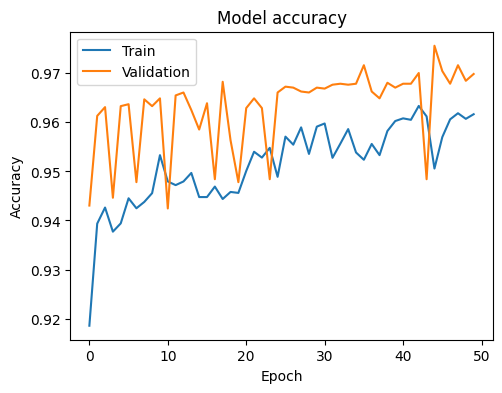

In [44]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

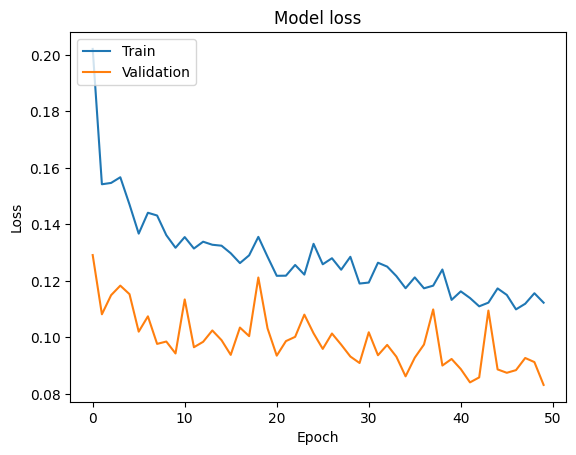

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#***Confusion Matrix***

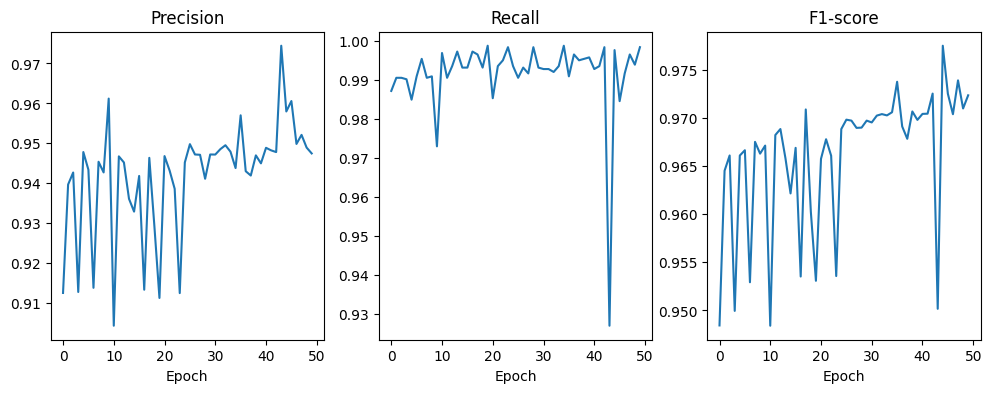

In [46]:
# Plot precision, recall, and F1-score
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(metrics_callback.precision)
plt.title('Precision')
plt.xlabel('Epoch')

plt.subplot(1, 3, 2)
plt.plot(metrics_callback.recall)
plt.title('Recall')
plt.xlabel('Epoch')

plt.subplot(1, 3, 3)
plt.plot(metrics_callback.f1s)
plt.title('F1-score')
plt.xlabel('Epoch')
plt.show()

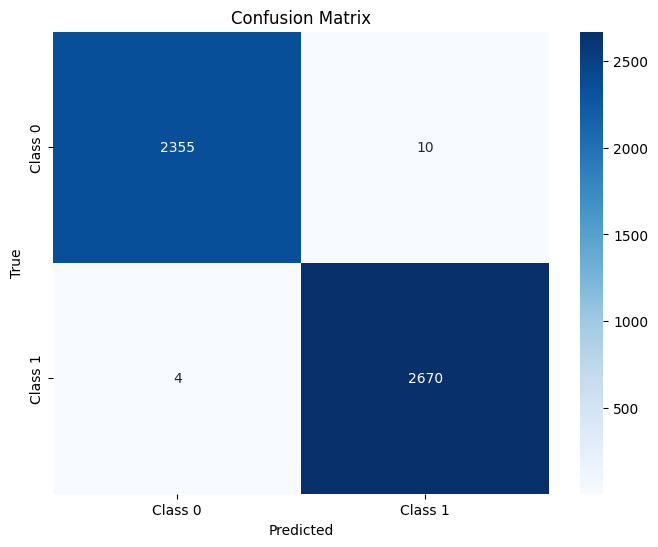

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#***Prediction of Test Split***

In [48]:
val_predictions = xgb_model.predict(x_val_stack)
print(f"Predictions on validation data: {val_predictions}")

Predictions on validation data: [0 1 0 ... 1 1 1]


In [49]:
# Detailed predictions output
detailed_output = pd.DataFrame({
    'Actual': y_val,
    'Predicted': val_predictions
})

# Display the detailed output
print(detailed_output)
# Optionally save to a CSV file for further analysis
detailed_output.to_csv('detailed_predictions_output.csv', index=False)

       Actual  Predicted
19064       0          0
11127       1          1
6517        0          0
2973        1          1
13339       0          0
...       ...        ...
16632       1          1
360         1          1
14748       1          1
2910        1          1
6253        1          1

[5039 rows x 2 columns]
